<a href="https://colab.research.google.com/github/Pranayap22/Data-Analysis-/blob/main/Stock_market_prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
#downloading dataset of Microsoft from 2010-01-04 to 2024-12-31
df=yf.download("MSFT", start="2010-01-04", end="2024-12-31")
df

/tmp/ipython-input-6-1877040838.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download("MSFT", start="2010-01-04", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2010-01-04,23.211445,23.323939,22.941457,22.963956,38409100
2010-01-05,23.218946,23.323943,22.978958,23.136451,49749600
2010-01-06,23.076448,23.308937,22.888957,23.158944,58182400
2010-01-07,22.836462,23.023953,22.641471,22.971455,50559700
2010-01-08,22.993954,23.158946,22.678968,22.708967,51197400
...,...,...,...,...,...
2024-12-23,433.583038,435.973841,431.172293,435.067322,19152500
2024-12-24,437.647400,437.916385,432.527101,432.985331,7164500


In [7]:
#checking what columns are there in dataset
df.columns
#so there is multi index in the column

MultiIndex([( 'Close', 'MSFT'),
            (  'High', 'MSFT'),
            (   'Low', 'MSFT'),
            (  'Open', 'MSFT'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])

In [8]:
#now checking if there is null values present or not
df.isnull().sum()

,,0
Price,Ticker,
Close,MSFT,0
High,MSFT,0
Low,MSFT,0
Open,MSFT,0
Volume,MSFT,0


In [9]:
#there is no null values but if null values are present then it should be deleted as follows
df.dropna(inplace=True)
df

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2010-01-04,23.211445,23.323939,22.941457,22.963956,38409100
2010-01-05,23.218946,23.323943,22.978958,23.136451,49749600
2010-01-06,23.076448,23.308937,22.888957,23.158944,58182400
2010-01-07,22.836462,23.023953,22.641471,22.971455,50559700
2010-01-08,22.993954,23.158946,22.678968,22.708967,51197400
...,...,...,...,...,...
2024-12-23,433.583038,435.973841,431.172293,435.067322,19152500
2024-12-24,437.647400,437.916385,432.527101,432.985331,7164500


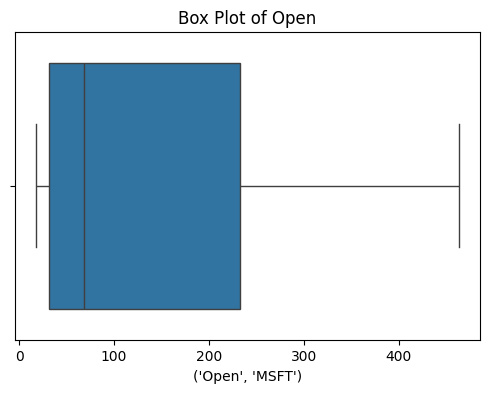

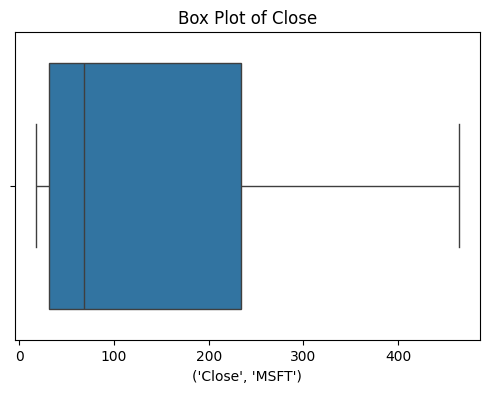

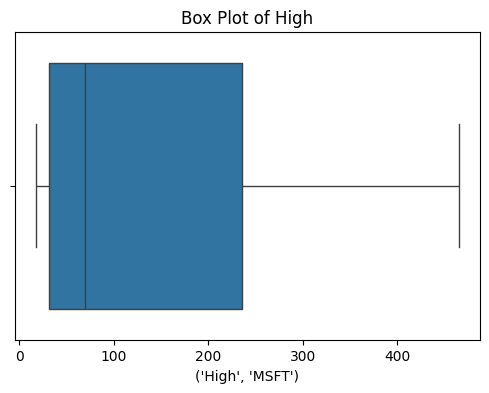

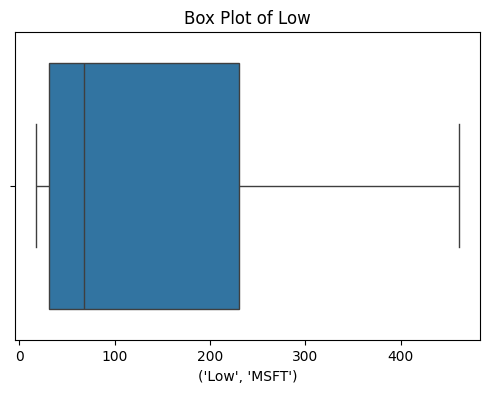

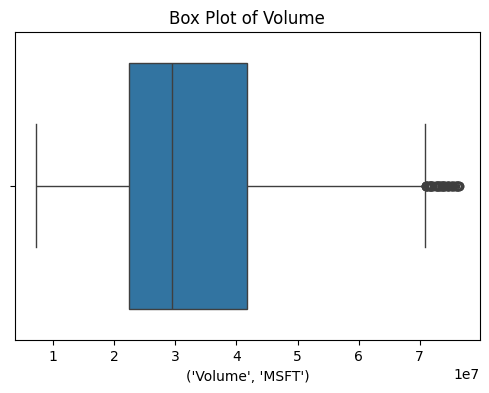

In [14]:
#now before applying any model we should check for any outliers and if they are present then we should remove them as they affects the model and reduces the performence of model
#we have to plot every column every column involves time series data
import seaborn as sns
import matplotlib.pyplot as plt
outliers = ['Open', 'Close', 'High', 'Low', 'Volume']

for col in outliers:
    plt.figure(figsize=(6,4))
    #as the dataset involves multi index we have to add MSFT as well
    sns.boxplot(x=df[(col, 'MSFT')])
    plt.title(f"Box Plot of {col}")
    plt.show()

In [11]:
#now we can see there is outliers in volume column se we have to remove them
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

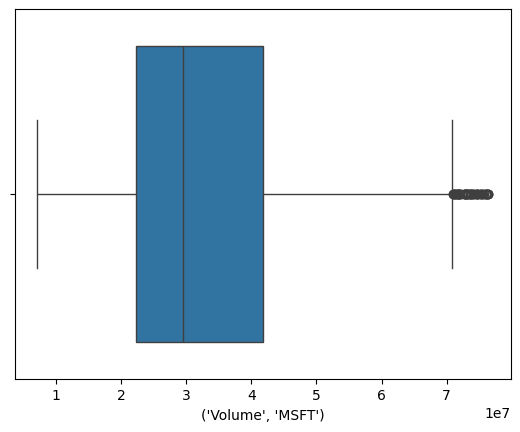

In [13]:
#now check for outliers for volume column and try to remove all of them
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df[('Volume','MSFT')])
plt.show()

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

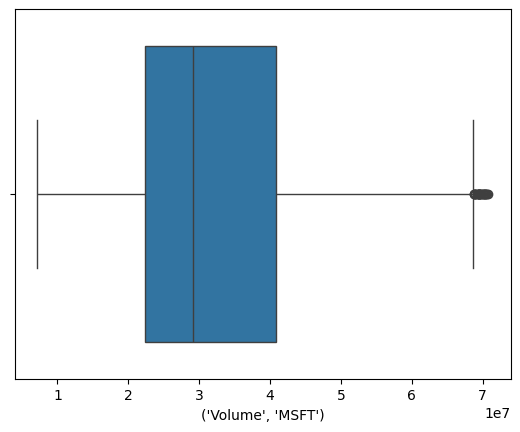

In [ ]:
sns.boxplot(x=df[('Volume','MSFT')])
plt.show()

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

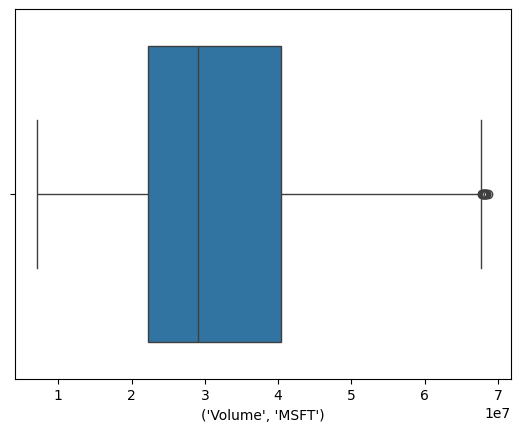

In [17]:
sns.boxplot(x=df[('Volume','MSFT')])
plt.show()

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

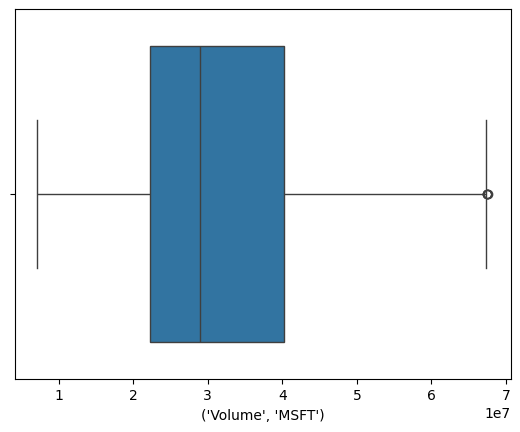

In [19]:
sns.boxplot(x=df[('Volume','MSFT')])
plt.show()

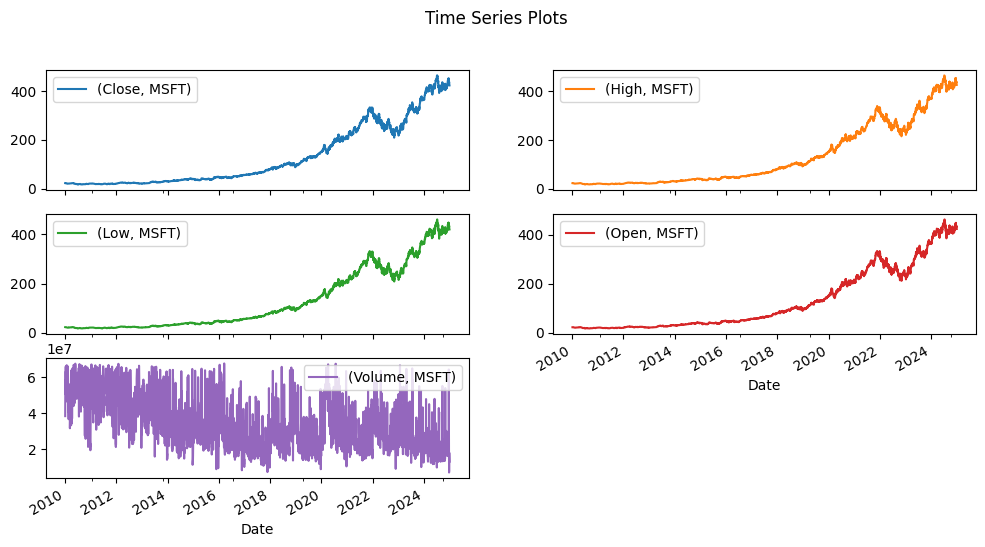

In [20]:
#so we can see ouliers are almost removed
#now we will do all the time series plots for all columns
df.plot(figsize=(12, 6), subplots=True, layout=(3, 2), title="Time Series Plots")
plt.show()

<Figure size 1000x600 with 0 Axes>

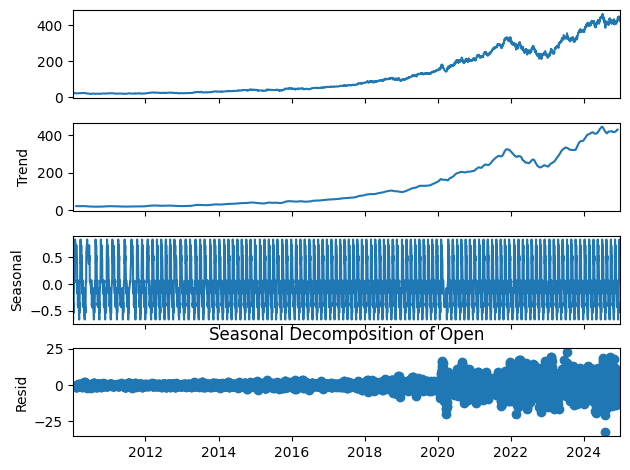

<Figure size 1000x600 with 0 Axes>

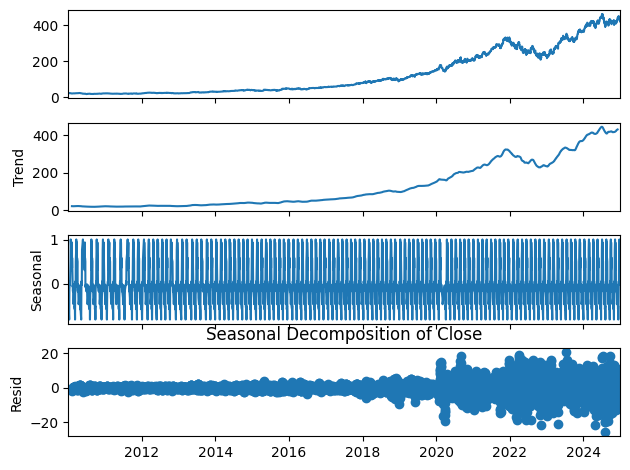

<Figure size 1000x600 with 0 Axes>

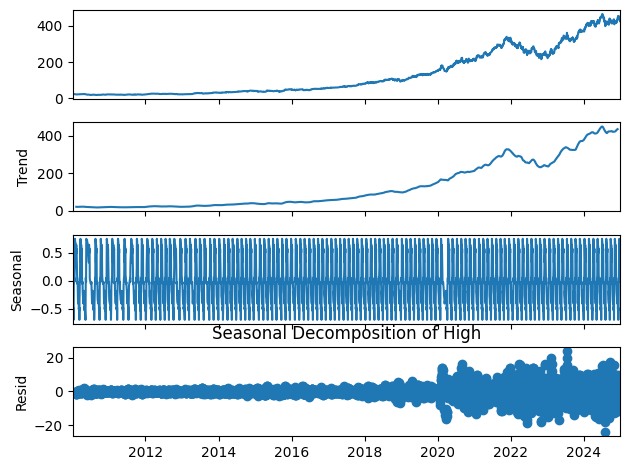

<Figure size 1000x600 with 0 Axes>

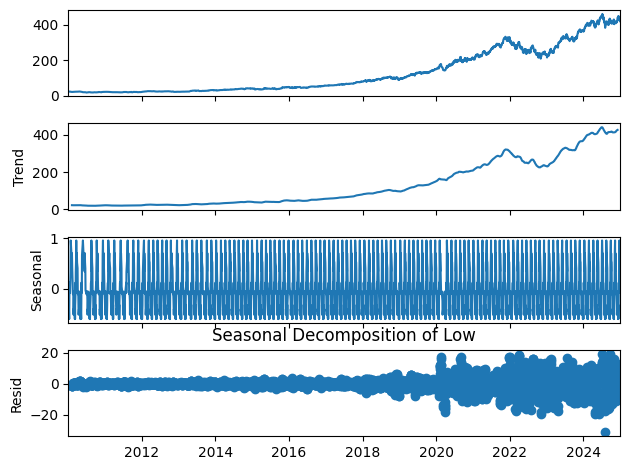

<Figure size 1000x600 with 0 Axes>

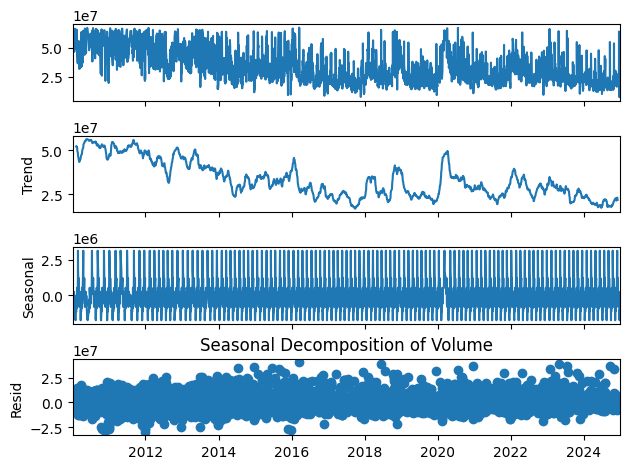

In [ ]:
#we can see here all the graphs are exponential except volume
#now we will do seasonal decomposition and for that we will chose additive model as almost all the columns are giving exponential time series graphs
# List of columns to analyze
seasonal_trend_residual = ['Open', 'Close', 'High', 'Low','Volume']

# Loop through each column and perform decomposition
for col in seasonal_trend_residual:
    result = seasonal_decompose(df[col], model='additive', period=30)
    plt.figure(figsize=(10, 6))
    result.plot()
    plt.title(f"Seasonal Decomposition of {col}")
    plt.show()

In [ ]:
#here we can see the trend of every column except volume is rising approximately from the year 2019 and have a significant peak in the last of 2021 and then decreased for a while and again rising
#the seasonal trend is changing after every 6 months
#volume column is acting differently as its time series plot was not exponential
#now as the price columns are not static so we are applying prophet model
#before applying prophet we have to make 4 copies of df as we will apply prophet individually to open close high low column to predict them
#and also we will first predict the existed data and check the model performence metrics and then will predict future prices
#first making 4 copies
open_price = df.copy()
close_price = df.copy()
low_price = df.copy()
high_price = df.copy()

In [ ]:
#doing all necessary operations for prediction of open price for existing data

#renaming open column to y and date column to ds
# Reset index to make Date a column
open_price.reset_index(inplace=True)

# Rename columns
open_price.rename(columns={
    'Date': 'ds',
    'Close': 'close',
    'High': 'high',
    'Low': 'low',
    'Open': 'y',        # Prophet's target variable and all the other columns act as regressors
    'Volume': 'volume'
}, inplace=True)

In [ ]:
#now splitting the dataset for training and testing
split_date = "2023-01-01"
train_open = open_price[open_price['ds'] < split_date]  # Training set
test_open = open_price[open_price['ds'] >= split_date]  # Testing set


In [ ]:
#checking datatypes of the columns
train_open.dtypes

,,0
Price,Ticker,
ds,,datetime64[ns]
close,MSFT,float64
high,MSFT,float64
low,MSFT,float64
y,MSFT,float64
volume,MSFT,int64


In [ ]:
# Convert regressor's data type  to numeric type
train_open[['high', 'low', 'close', 'volume']] = train_open[['high', 'low', 'close', 'volume']].apply(pd.to_numeric, errors='coerce')


<ipython-input-32-69355975>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_open[['high', 'low', 'close', 'volume']] = train_open[['high', 'low', 'close', 'volume']].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Initialize Prophet model
model_open = Prophet()

# Flatten the multi-level column index
train_open.columns = train_open.columns.droplevel('Ticker')

# Add all columns as regressors except 'ds' and 'y'
for col in [ 'high', 'low', 'close', 'volume']:
    model_open.add_regressor(col)

# Fit model
model_open.fit(train_open)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrr4stn0/ngfq8znj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrr4stn0/mqmahw0c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40155', 'data', 'file=/tmp/tmpgrr4stn0/ngfq8znj.json', 'init=/tmp/tmpgrr4stn0/mqmahw0c.json', 'output', 'file=/tmp/tmpgrr4stn0/prophet_model2meu24e1/prophet_model-20250615193415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:34:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:34:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Convert regressors to numeric
test_open[['high', 'low', 'close', 'volume']] = test_open[['high', 'low', 'close', 'volume']].apply(pd.to_numeric, errors='coerce')


<ipython-input-35-1457748911>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_open[['high', 'low', 'close', 'volume']] = test_open[['high', 'low', 'close', 'volume']].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Creating future dataframe with regressors
future_open = test_open[['ds', 'high', 'low', 'close', 'volume']]

# Flatten the multi-level column index of the future DataFrame
future_open.columns = future_open.columns.droplevel('Ticker')

forecast_open = model_open.predict(future_open)

In [ ]:
#So here is the forecast of open price among existing dataset
forecast_open
#here it is showing only 498 rows as we have splitted the dataset into training and testing and we have predicted the prices for the test dataset part#
#here yhat is the predicted open price

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,close,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-03,84.713968,237.212191,239.111937,84.713968,84.713968,153.498336,153.498336,153.498336,-86.145686,...,12.514231,12.514231,12.514231,0.035937,0.035937,0.035937,0.0,0.0,0.0,238.212304
1,2023-01-04,84.713813,224.126329,225.981905,84.713813,84.713813,140.360322,140.360322,140.360322,-79.694885,...,12.408067,12.408067,12.408067,0.027839,0.027839,0.027839,0.0,0.0,0.0,225.074135
2,2023-01-05,84.713657,220.692830,222.554359,84.713657,84.713657,136.873059,136.873059,136.873059,-75.515390,...,12.402285,12.402285,12.402285,0.019222,0.019222,0.019222,0.0,0.0,0.0,221.586716
3,2023-01-06,84.713501,215.732340,217.724215,84.713501,84.713501,132.022241,132.022241,132.022241,-77.128083,...,12.501531,12.501531,12.501531,0.010197,0.010197,0.010197,0.0,0.0,0.0,216.735742
4,2023-01-09,84.713034,224.297634,226.156801,84.713034,84.713034,140.554133,140.554133,140.554133,-78.476118,...,12.462654,12.462654,12.462654,-0.018038,-0.018038,-0.018038,0.0,0.0,0.0,225.267167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2024-12-23,84.601817,432.848368,434.922565,84.189540,84.965590,349.279786,349.279786,349.279786,-210.984185,...,12.462654,12.462654,12.462654,0.074316,0.074316,0.074316,0.0,0.0,0.0,433.881603
494,2024-12-24,84.601661,432.995515,435.092327,84.187959,84.966638,349.486485,349.486485,349.486485,-213.536756,...,12.514231,12.514231,12.514231,0.074638,0.074638,0.074638,0.0,0.0,0.0,434.088146
495,2024-12-26,84.601349,436.753838,438.795760,84.186264,84.967531,353.160051,353.160051,353.160051,-212.773496,...,12.402285,12.402285,12.402285,0.072845,0.072845,0.072845,0.0,0.0,0.0,437.761400
496,2024-12-27,84.601194,428.674228,430.846689,84.184665,84.968579,345.200091,345.200091,345.200091,-208.031172,...,12.501531,12.501531,12.501531,0.070672,0.070672,0.070672,0.0,0.0,0.0,429.801285


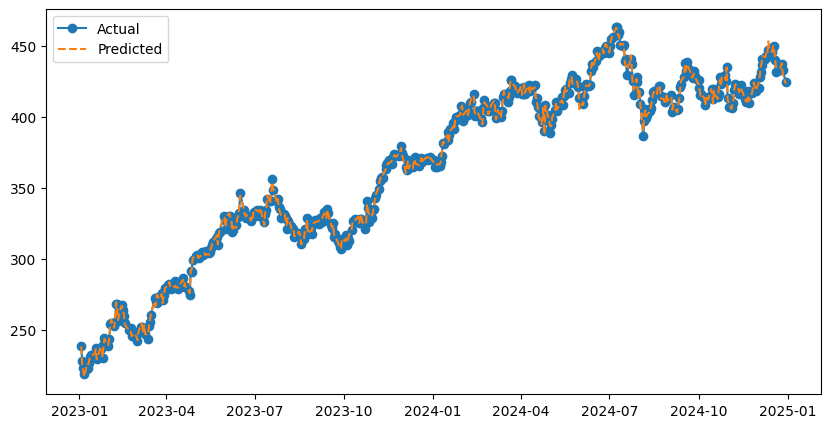

In [ ]:
#ploting the forecasted data
plt.figure(figsize=(10,5))
plt.plot(test_open['ds'], test_open['y'], label='Actual', marker='o')
plt.plot(forecast_open['ds'], forecast_open['yhat'], label='Predicted', linestyle='dashed')
plt.legend()
plt.show()
#here from the plot we can see how model predicted the open price on the existed dates in the dataset

In [ ]:
#now checking the model performence metrics by comparing the metrics with predicted data and tested data by measuring mean squarred error mean absolute error and r2_score
mae_open = mean_absolute_error(test_open['y'], forecast_open['yhat'])
rmse_open = np.sqrt(mean_squared_error(test_open['y'], forecast_open['yhat']))
r2_open = r2_score(test_open['y'], forecast_open['yhat'])
print(f"MAE: {mae_open:.2f}")
print(f"RMSE: {rmse_open:.2f}")
print(f"R² Score: {r2_open:.4f}")
#r2_score more closer to 1 means model is more accurate to predict the prices hence model predicted very acurately
#Lower MAE → Better model accuracy
#Lower RMSE → Model is better at avoiding large deviations

MAE: 1.40
RMSE: 1.79
R² Score: 0.9992


In [ ]:
#now we can predict future prices for open price
open_price.columns=open_price.columns.droplevel('Ticker')
new_model_open = Prophet()
new_model_open.fit(open_price)
new_future_open = model_open.make_future_dataframe(periods=365)  # Generating prediction for future dates

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrr4stn0/0yruuiwi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrr4stn0/bu6l3iib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13028', 'data', 'file=/tmp/tmpgrr4stn0/0yruuiwi.json', 'init=/tmp/tmpgrr4stn0/bu6l3iib.json', 'output', 'file=/tmp/tmpgrr4stn0/prophet_modelde6qs26t/prophet_model-20250615202257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:22:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:22:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
new_future_open

,ds
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08
...,...
3388,2023-12-26
3389,2023-12-27
3390,2023-12-28
3391,2023-12-29


In [ ]:
new_forecast_open=new_model_open.predict(new_future_open)

In [ ]:
new_forecast_open[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-04,18.020022,-2.771736,37.557476
1,2010-01-05,17.901530,-3.564094,37.440539
2,2010-01-06,17.700586,-3.173032,39.077275
3,2010-01-07,17.420575,-5.750749,38.359857
4,2010-01-08,17.343620,-4.629952,39.627054
...,...,...,...,...
3388,2023-12-26,365.795379,345.238773,386.236189
3389,2023-12-27,365.867128,345.170740,386.893816
3390,2023-12-28,365.837149,342.525069,385.890800
3391,2023-12-29,365.984532,343.242482,387.471002


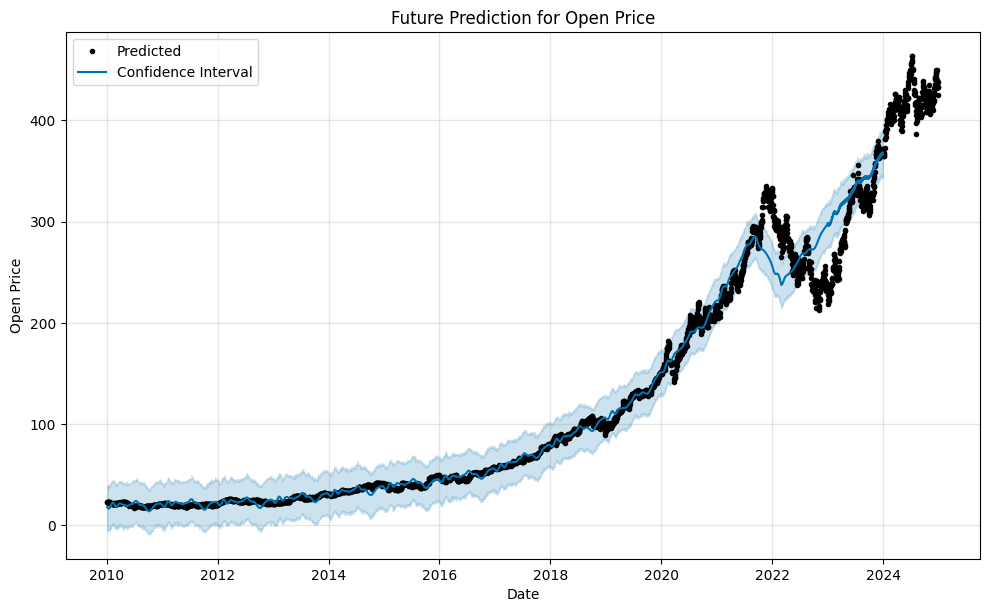

In [ ]:
#ploting future predictions
fig = new_model_open.plot(new_forecast_open)
plt.title("Future Prediction for Open Price")
plt.xlabel("Date")
plt.ylabel("Open Price")
# Add legend to specify what each color represents
plt.legend(labels=['Predicted', 'Confidence Interval'], loc='upper left')
plt.show()


In [ ]:
#now doing all the predictions for other columns as well
#doing all necessary operations for prediction of close price for existing data

#renaming close column to y and date column to ds
# Reset index to make Date a column
close_price.reset_index(inplace=True)

# Rename columns
close_price.rename(columns={
    'Date': 'ds',
    'Close': 'y',         # Prophet's target variable and all the other columns act as regressors
    'High': 'high',
    'Low': 'low',
    'Open': 'open',
    'Volume': 'volume'
}, inplace=True)


In [ ]:
#now splitting the dataset for training and testing
split_date = "2023-01-01"
train_close = close_price[close_price['ds'] < split_date]  # Training set
test_close = close_price[close_price['ds'] >= split_date]  # Testing set


In [ ]:
#checking datatypes of the columns
train_close.dtypes

,0
Price,
ds,datetime64[ns]
y,float64
high,float64
low,float64
open,float64
volume,int64


In [ ]:
# Convert regressor's data type  to numeric type
train_close[['high', 'low', 'open', 'volume']] = train_close[['high', 'low', 'open', 'volume']].apply(pd.to_numeric, errors='coerce')


<ipython-input-63-3841639321>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close[['high', 'low', 'open', 'volume']] = train_close[['high', 'low', 'open', 'volume']].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Initialize Prophet model
model_close = Prophet()

# Flatten the multi-level column index
train_close.columns = train_close.columns.droplevel('Ticker')

# Add all columns as regressors except 'ds' and 'y'
for col in [ 'high', 'low', 'open', 'volume']:
    model_close.add_regressor(col)

# Fit model
model_close.fit(train_close)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrr4stn0/267sp5ey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrr4stn0/4yr4yykq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25120', 'data', 'file=/tmp/tmpgrr4stn0/267sp5ey.json', 'init=/tmp/tmpgrr4stn0/4yr4yykq.json', 'output', 'file=/tmp/tmpgrr4stn0/prophet_model_ase97a5/prophet_model-20250615204823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:48:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:48:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Convert regressors to numeric
test_close[['high', 'low', 'open', 'volume']] = test_close[['high', 'low', 'open', 'volume']].apply(pd.to_numeric, errors='coerce')


<ipython-input-65-3707915987>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close[['high', 'low', 'open', 'volume']] = test_close[['high', 'low', 'open', 'volume']].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Creating future dataframe with regressors
future_close = test_close[['ds', 'high', 'low', 'open', 'volume']]

# Flatten the multi-level column index of the future DataFrame
future_close.columns = future_close.columns.droplevel('Ticker')

forecast_close = model_close.predict(future_close)

In [ ]:
#So here is the forecast of close price among existing dataset
forecast_close
#here it is showing only 498 rows as we have splitted the dataset into training and testing and we have predicted the prices for the test dataset part#
#here yhat is the predicted close price

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-03,85.112853,234.919984,236.871539,85.112853,85.112853,150.718809,150.718809,150.718809,138.308819,...,12.410073,12.410073,12.410073,-0.000082,-0.000082,-0.000082,0.0,0.0,0.0,235.831663
1,2023-01-04,85.112818,221.869091,223.911630,85.112818,85.112818,137.791498,137.791498,137.791498,125.424195,...,12.378957,12.378957,12.378957,-0.011654,-0.011654,-0.011654,0.0,0.0,0.0,222.904316
2,2023-01-05,85.112782,217.492145,219.485427,85.112782,85.112782,133.338509,133.338509,133.338509,120.982483,...,12.379526,12.379526,12.379526,-0.023500,-0.023500,-0.023500,0.0,0.0,0.0,218.451291
3,2023-01-06,85.112747,216.926263,218.896223,85.112747,85.112747,132.787980,132.787980,132.787980,120.374248,...,12.449186,12.449186,12.449186,-0.035454,-0.035454,-0.035454,0.0,0.0,0.0,217.900726
4,2023-01-09,85.112640,224.914129,226.998552,85.112640,85.112640,140.849291,140.849291,140.849291,128.491851,...,12.427640,12.427640,12.427640,-0.070200,-0.070200,-0.070200,0.0,0.0,0.0,225.961931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2024-12-23,85.087279,431.748556,433.972360,84.712128,85.439708,347.851559,347.851559,347.851559,335.348508,...,12.427640,12.427640,12.427640,0.075410,0.075410,0.075410,0.0,0.0,0.0,432.938838
494,2024-12-24,85.087244,436.091579,438.290011,84.711100,85.440922,352.125281,352.125281,352.125281,339.642209,...,12.410073,12.410073,12.410073,0.072999,0.072999,0.072999,0.0,0.0,0.0,437.212525
495,2024-12-26,85.087173,436.194909,438.355126,84.710281,85.441879,352.183741,352.183741,352.183741,339.739310,...,12.379526,12.379526,12.379526,0.064905,0.064905,0.064905,0.0,0.0,0.0,437.270914
496,2024-12-27,85.087137,425.795114,427.867762,84.708989,85.442872,341.776666,341.776666,341.776666,329.268243,...,12.449186,12.449186,12.449186,0.059237,0.059237,0.059237,0.0,0.0,0.0,426.863803


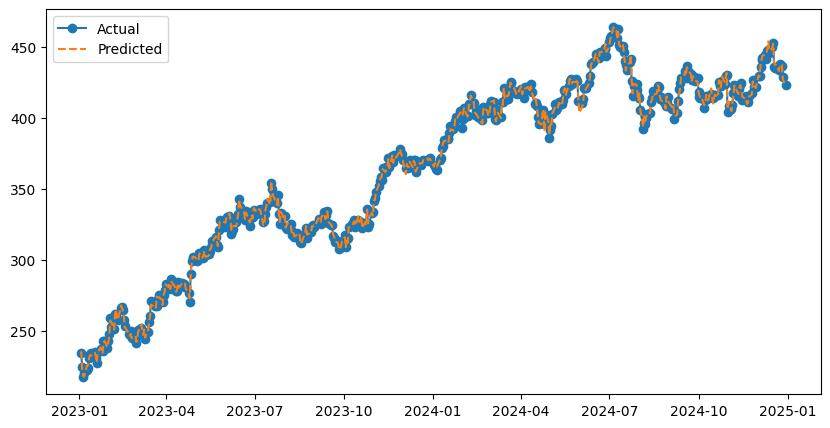

In [ ]:
#ploting the forecasted data
plt.figure(figsize=(10,5))
plt.plot(test_close['ds'], test_close['y'], label='Actual', marker='o')
plt.plot(forecast_close['ds'], forecast_close['yhat'], label='Predicted', linestyle='dashed')
plt.legend()
plt.show()
#here from the plot we can see how model predicted the close price on the existed dates in the dataset

In [ ]:
#now checking the model performence metrics by comparing the metrics with predicted data and tested data by measuring mean squarred error mean absolute error and r2_score
mae_close = mean_absolute_error(test_close['y'], forecast_close['yhat'])
rmse_close = np.sqrt(mean_squared_error(test_close['y'], forecast_close['yhat']))
r2_close = r2_score(test_close['y'], forecast_close['yhat'])
print(f"MAE: {mae_close:.2f}")
print(f"RMSE: {rmse_close:.2f}")
print(f"R² Score: {r2_close:.4f}")
#r2_score more closer to 1 means model is more accurate to predict the prices hence model predicted very acurately
#Lower MAE → Better model accuracy
#Lower RMSE → Model is better at avoiding large deviations

MAE: 1.31
RMSE: 1.73
R² Score: 0.9992


In [ ]:
#now we can predict future prices for close price
new_model_close = Prophet()
new_model_close.fit(close_price)
new_future_close = model_close.make_future_dataframe(periods=365)  # Generating prediction for future dates

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrr4stn0/9jr65d86.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrr4stn0/28kehuin.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23653', 'data', 'file=/tmp/tmpgrr4stn0/9jr65d86.json', 'init=/tmp/tmpgrr4stn0/28kehuin.json', 'output', 'file=/tmp/tmpgrr4stn0/prophet_modelajxourei/prophet_model-20250615212510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:25:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:25:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
new_future_close

,ds
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08
...,...
3388,2023-12-26
3389,2023-12-27
3390,2023-12-28
3391,2023-12-29


In [ ]:
new_forecast_close=new_model_close.predict(new_future_close)

In [ ]:
new_forecast_close[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-04,17.925551,-3.177794,39.575779
1,2010-01-05,17.618020,-3.826414,40.945500
2,2010-01-06,17.532491,-3.215891,38.861480
3,2010-01-07,17.256745,-4.596173,37.292550
4,2010-01-08,17.221367,-3.446298,38.010944
...,...,...,...,...
3388,2023-12-26,365.646494,343.014515,387.201570
3389,2023-12-27,365.816107,343.188156,388.632790
3390,2023-12-28,365.773246,345.198822,386.514858
3391,2023-12-29,365.945647,345.156446,386.441373


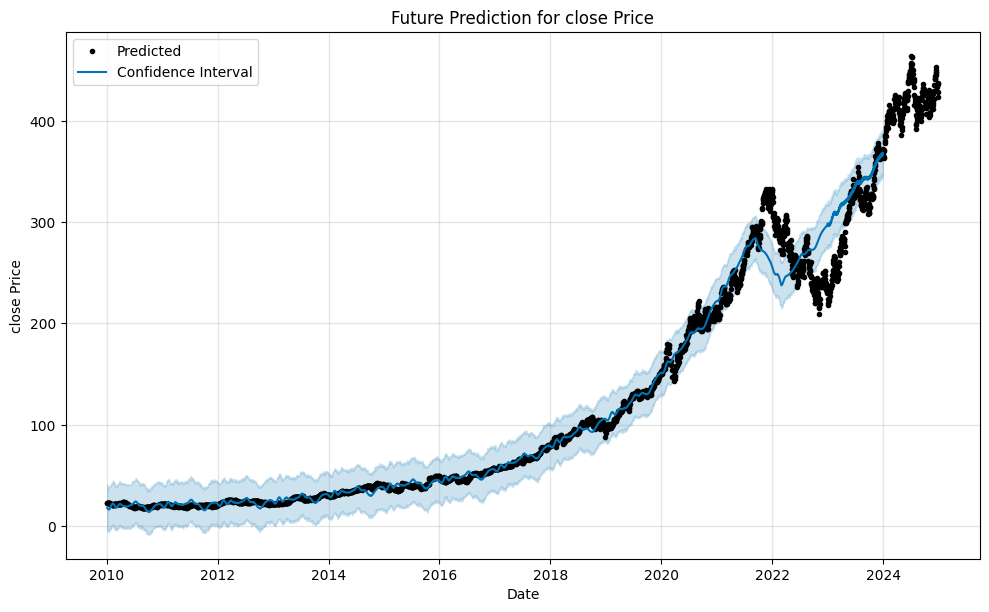

In [ ]:
#ploting future predictions
fig = new_model_close.plot(new_forecast_close)
plt.title("Future Prediction for close Price")
plt.xlabel("Date")
plt.ylabel("close Price")
# Add legend to specify what each color represents
plt.legend(labels=['Predicted', 'Confidence Interval'], loc='upper left')
plt.show()


In [ ]:
#doing all necessary operations for prediction of high price for existing data

#renaming high column to y and date column to ds
# Reset index to make Date a column
high_price.reset_index(inplace=True)

# Rename columns
high_price.rename(columns={
    'Date': 'ds',
    'Close': 'close',
    'High': 'y',               # Prophet's target variable and all the other columns act as regressors
    'Low': 'low',
    'Open': 'open',
    'Volume': 'volume'
}, inplace=True)

In [ ]:
#now splitting the dataset for training and testing
split_date = "2023-01-01"
train_high = high_price[high_price['ds'] < split_date]  # Training set
test_high = high_price[high_price['ds'] >= split_date]  # Testing set


In [ ]:
#checking datatypes of the columns
train_high.dtypes

,,0
Price,Ticker,
ds,,datetime64[ns]
close,MSFT,float64
y,MSFT,float64
low,MSFT,float64
open,MSFT,float64
volume,MSFT,int64


In [ ]:
# Convert regressor's data type  to numeric type
train_high[['close', 'low', 'open', 'volume']] = train_high[['close', 'low', 'open', 'volume']].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Initialize Prophet model
model_high = Prophet()

# Flatten the multi-level column index
train_high.columns = train_high.columns.droplevel('Ticker')

# Add all columns as regressors except 'ds' and 'y'
for col in [ 'close', 'low', 'open', 'volume']:
    model_high.add_regressor(col)

# Fit model
model_high.fit(train_high)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrr4stn0/s2oxr8_k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrr4stn0/jgar6wbb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73669', 'data', 'file=/tmp/tmpgrr4stn0/s2oxr8_k.json', 'init=/tmp/tmpgrr4stn0/jgar6wbb.json', 'output', 'file=/tmp/tmpgrr4stn0/prophet_model2mnwtbg1/prophet_model-20250615211458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:14:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:15:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Convert regressors to numeric
test_high[['close', 'low', 'open', 'volume']] = test_high[['close', 'low', 'open', 'volume']].apply(pd.to_numeric, errors='coerce')


<ipython-input-82-291522019>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_high[['close', 'low', 'open', 'volume']] = test_high[['close', 'low', 'open', 'volume']].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Creating future dataframe with regressors
future_high = test_high[['ds', 'close', 'low', 'open', 'volume']]

# Flatten the multi-level column index of the future DataFrame
future_high.columns = future_high.columns.droplevel('Ticker')

forecast_high = model_high.predict(future_high)

In [ ]:
#So here is the forecast of high price among existing dataset
forecast_high
#here it is showing only 498 rows as we have splitted the dataset into training and testing and we have predicted the prices for the test dataset part#
#here yhat is the predicted high price

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,close,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-03,88.317940,239.252957,240.889046,88.317940,88.317940,151.809260,151.809260,151.809260,82.659641,...,12.325138,12.325138,12.325138,0.008366,0.008366,0.008366,0.0,0.0,0.0,240.127200
1,2023-01-04,88.319188,229.694034,231.374073,88.319188,88.319188,142.207675,142.207675,142.207675,76.469884,...,12.400352,12.400352,12.400352,0.015921,0.015921,0.015921,0.0,0.0,0.0,230.526863
2,2023-01-05,88.320436,223.296561,224.962767,88.320436,88.320436,135.770680,135.770680,135.770680,72.459520,...,12.412567,12.412567,12.412567,0.023514,0.023514,0.023514,0.0,0.0,0.0,224.091116
3,2023-01-06,88.321684,222.639408,224.337761,88.321684,88.321684,135.164195,135.164195,135.164195,74.006952,...,12.297662,12.297662,12.297662,0.031004,0.031004,0.031004,0.0,0.0,0.0,223.485879
4,2023-01-09,88.325428,224.048668,225.728957,88.325428,88.325428,136.548810,136.548810,136.548810,75.300436,...,12.376713,12.376713,12.376713,0.051371,0.051371,0.051371,0.0,0.0,0.0,224.874238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2024-12-23,89.216477,437.014492,439.239106,88.435347,89.930361,348.904087,348.904087,348.904087,202.446320,...,12.376713,12.376713,12.376713,-0.043427,-0.043427,-0.043427,0.0,0.0,0.0,438.120563
494,2024-12-24,89.217725,437.323685,439.684011,88.433856,89.935227,349.249765,349.249765,349.249765,204.895596,...,12.325138,12.325138,12.325138,-0.041597,-0.041597,-0.041597,0.0,0.0,0.0,438.467490
495,2024-12-26,89.220221,439.023498,441.258660,88.433613,89.941342,350.944682,350.944682,350.944682,204.163222,...,12.412567,12.412567,12.412567,-0.035810,-0.035810,-0.035810,0.0,0.0,0.0,440.164903
496,2024-12-27,89.221468,434.511947,436.722046,88.432122,89.945136,346.371178,346.371178,346.371178,199.612805,...,12.297662,12.297662,12.297662,-0.031847,-0.031847,-0.031847,0.0,0.0,0.0,435.592647


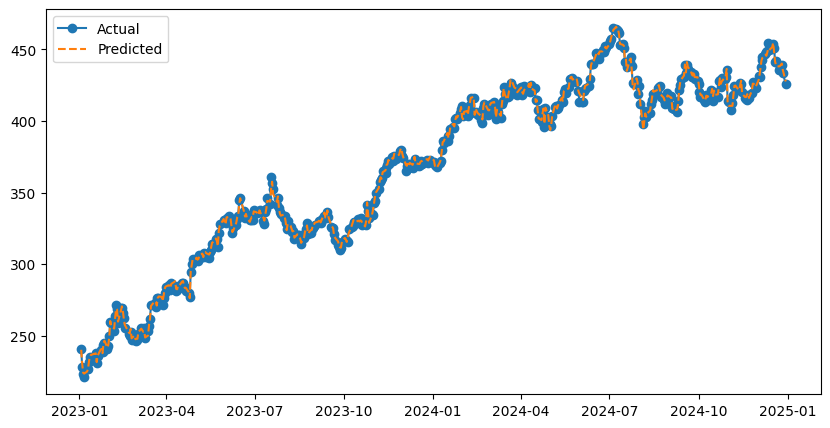

In [ ]:
#ploting the forecasted data
plt.figure(figsize=(10,5))
plt.plot(test_high['ds'], test_high['y'], label='Actual', marker='o')
plt.plot(forecast_high['ds'], forecast_high['yhat'], label='Predicted', linestyle='dashed')
plt.legend()
plt.show()
#here from the plot we can see how model predicted the high price on the existed dates in the dataset

In [ ]:
#now checking the model performence metrics by comparing the metrics with predicted data and tested data by measuring mean squarred error mean absolute error and r2_score
mae_high = mean_absolute_error(test_high['y'], forecast_high['yhat'])
rmse_high = np.sqrt(mean_squared_error(test_high['y'], forecast_high['yhat']))
r2_high = r2_score(test_high['y'], forecast_high['yhat'])
print(f"MAE: {mae_high:.2f}")
print(f"RMSE: {rmse_high:.2f}")
print(f"R² Score: {r2_high:.4f}")
#r2_score more closer to 1 means model is more accurate to predict the prices hence model predicted very acurately
#Lower MAE → Better model accuracy
#Lower RMSE → Model is better at avoiding large deviations

MAE: 1.34
RMSE: 1.68
R² Score: 0.9993


In [ ]:
#now we can predict future prices for high price
high_price.columns=high_price.columns.droplevel('Ticker')
new_model_high = Prophet()
new_model_high.fit(high_price)
new_future_high = model_high.make_future_dataframe(periods=365)  # Generating prediction for future dates

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrr4stn0/72nh_fuq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrr4stn0/m_g3ljt3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30638', 'data', 'file=/tmp/tmpgrr4stn0/72nh_fuq.json', 'init=/tmp/tmpgrr4stn0/m_g3ljt3.json', 'output', 'file=/tmp/tmpgrr4stn0/prophet_modelrlihzwoh/prophet_model-20250615212823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:28:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:28:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
new_future_high

,ds
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08
...,...
3388,2023-12-26
3389,2023-12-27
3390,2023-12-28
3391,2023-12-29


In [ ]:
new_forecast_high = new_model_high.predict(new_future_high)

In [ ]:
new_forecast_high[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-04,18.047212,-2.877957,38.971496
1,2010-01-05,17.849485,-3.046757,39.447985
2,2010-01-06,17.840201,-4.907620,38.444935
3,2010-01-07,17.606464,-3.961849,40.856301
4,2010-01-08,17.460361,-4.077348,38.348679
...,...,...,...,...
3388,2023-12-26,368.657921,348.153915,391.402953
3389,2023-12-27,368.885078,347.011069,391.780024
3390,2023-12-28,368.864078,346.755787,388.949758
3391,2023-12-29,368.904632,346.805060,390.750686


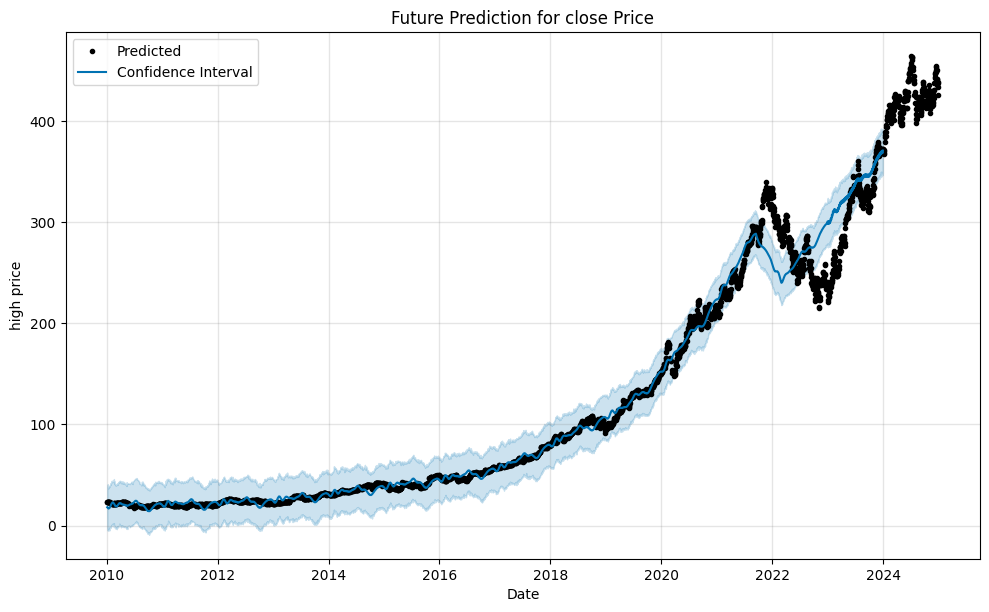

In [ ]:
#ploting future predictions
fig = new_model_high.plot(new_forecast_high)
plt.title("Future Prediction for close Price")
plt.xlabel("Date")
plt.ylabel("high price")
# Add legend to specify what each color represents
plt.legend(labels=['Predicted', 'Confidence Interval'], loc='upper left')
plt.show()


In [ ]:
#doing all necessary operations for prediction of low price for existing data

#renaming high column to y and date column to ds
# Reset index to make Date a column
low_price.reset_index(inplace=True)

# Rename columns
low_price.rename(columns={
    'Date': 'ds',
    'Close': 'close',
    'High': 'high',
    'Low': 'y',                   # Prophet's target variable and all the other columns act as regressors
    'Open': 'open',
    'Volume': 'volume'
}, inplace=True)

In [ ]:
#now splitting the dataset for training and testing
split_date = "2023-01-01"
train_low = low_price[low_price['ds'] < split_date]  # Training set
test_low = low_price[low_price['ds'] >= split_date]  # Testing set


In [ ]:
#checking datatypes of the columns
train_low.dtypes

,,0
Price,Ticker,
ds,,datetime64[ns]
close,MSFT,float64
high,MSFT,float64
y,MSFT,float64
open,MSFT,float64
volume,MSFT,int64


In [ ]:
# Convert regressor's data type  to numeric type
train_low[['close', 'high', 'open', 'volume']] = train_low[['close', 'high', 'open', 'volume']].apply(pd.to_numeric, errors='coerce')


<ipython-input-99-3777583286>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_low[['close', 'high', 'open', 'volume']] = train_low[['close', 'high', 'open', 'volume']].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Initialize Prophet model
model_low = Prophet()

# Flatten the multi-level column index
train_low.columns = train_low.columns.droplevel('Ticker')

# Add all columns as regressors except 'ds' and 'y'
for col in [ 'close', 'high', 'open', 'volume']:
    model_low.add_regressor(col)

# Fit model
model_low.fit(train_low)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrr4stn0/7wrbe5zb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrr4stn0/4n6cj75d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7615', 'data', 'file=/tmp/tmpgrr4stn0/7wrbe5zb.json', 'init=/tmp/tmpgrr4stn0/4n6cj75d.json', 'output', 'file=/tmp/tmpgrr4stn0/prophet_model7pqn71yu/prophet_model-20250615214103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:41:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:41:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Convert regressors to numeric
test_low[['close', 'high', 'open', 'volume']] = test_low[['close', 'high', 'open', 'volume']].apply(pd.to_numeric, errors='coerce')


<ipython-input-102-227716900>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_low[['close', 'high', 'open', 'volume']] = test_low[['close', 'high', 'open', 'volume']].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Creating future dataframe with regressors
future_low = test_low[['ds', 'close', 'high', 'open', 'volume']]

# Flatten the multi-level column index of the future DataFrame
future_low.columns = future_low.columns.droplevel('Ticker')

forecast_low = model_low.predict(future_low)

In [ ]:
#So here is the forecast of low price among existing dataset
forecast_low
#here it is showing only 498 rows as we have splitted the dataset into training and testing and we have predicted the prices for the test dataset part
#here yhat is the predicted low price

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,close,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-03,82.819591,231.967736,233.754005,82.819591,82.819591,150.007832,150.007832,150.007832,88.133339,...,12.395992,12.395992,12.395992,-0.025977,-0.025977,-0.025977,0.0,0.0,0.0,232.827423
1,2023-01-04,82.818561,221.722324,223.355367,82.818561,82.818561,139.748637,139.748637,139.748637,81.533698,...,12.430292,12.430292,12.430292,-0.017576,-0.017576,-0.017576,0.0,0.0,0.0,222.567199
2,2023-01-05,82.817531,215.976332,217.688306,82.817531,82.817531,134.028574,134.028574,134.028574,77.257768,...,12.420790,12.420790,12.420790,-0.008601,-0.008601,-0.008601,0.0,0.0,0.0,216.846105
3,2023-01-06,82.816501,215.337064,217.117395,82.816501,82.816501,133.415393,133.415393,133.415393,78.907671,...,12.406977,12.406977,12.406977,0.000870,0.000870,0.000870,0.0,0.0,0.0,216.231895
4,2023-01-09,82.813412,217.727118,219.429945,82.813412,82.813412,135.757575,135.757575,135.757575,80.286809,...,12.370726,12.370726,12.370726,0.031350,0.031350,0.031350,0.0,0.0,0.0,218.570986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2024-12-23,82.078016,428.998017,431.215677,81.313600,82.836932,348.064273,348.064273,348.064273,215.852256,...,12.370726,12.370726,12.370726,-0.068657,-0.068657,-0.068657,0.0,0.0,0.0,430.142289
494,2024-12-24,82.076986,429.899726,432.304928,81.306525,82.838379,349.026985,349.026985,349.026985,218.463723,...,12.395992,12.395992,12.395992,-0.068480,-0.068480,-0.068480,0.0,0.0,0.0,431.103970
495,2024-12-26,82.074926,431.612766,433.990776,81.298737,82.838548,350.738020,350.738020,350.738020,217.682851,...,12.420790,12.420790,12.420790,-0.065654,-0.065654,-0.065654,0.0,0.0,0.0,432.812946
496,2024-12-27,82.073896,425.354311,427.763629,81.292993,82.839747,344.439822,344.439822,344.439822,212.831107,...,12.406977,12.406977,12.406977,-0.062988,-0.062988,-0.062988,0.0,0.0,0.0,426.513719


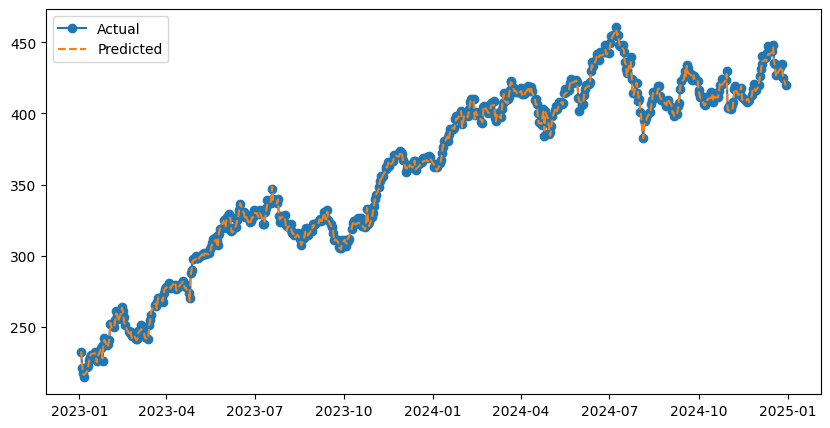

In [ ]:
#ploting the forecasted data
plt.figure(figsize=(10,5))
plt.plot(test_low['ds'], test_low['y'], label='Actual', marker='o')
plt.plot(forecast_low['ds'], forecast_low['yhat'], label='Predicted', linestyle='dashed')
plt.legend()
plt.show()
#here from the plot we can see how model predicted the low price on the existed dates in the dataset

In [ ]:
#now checking the model performence metrics by comparing the metrics with predicted data and tested data by measuring mean squarred error mean absolute error and r2_score
mae_low = mean_absolute_error(test_low['y'], forecast_low['yhat'])
rmse_low = np.sqrt(mean_squared_error(test_low['y'], forecast_low['yhat']))
r2_low = r2_score(test_low['y'], forecast_low['yhat'])
print(f"MAE: {mae_low:.2f}")
print(f"RMSE: {rmse_low:.2f}")
print(f"R² Score: {r2_low:.4f}")
#r2_score more closer to 1 means model is more accurate to predict the prices hence model predicted very acurately
#Lower MAE → Better model accuracy
#Lower RMSE → Model is better at avoiding large deviations

MAE: 1.25
RMSE: 1.57
R² Score: 0.9994


In [ ]:
#now we can predict future prices for high price
low_price.columns=low_price.columns.droplevel('Ticker')
new_model_low = Prophet()
new_model_low.fit(low_price)
new_future_low = model_low.make_future_dataframe(periods=365)  # Generating prediction for future dates

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrr4stn0/m4vw_00t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrr4stn0/4g9mckkw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80056', 'data', 'file=/tmp/tmpgrr4stn0/m4vw_00t.json', 'init=/tmp/tmpgrr4stn0/4g9mckkw.json', 'output', 'file=/tmp/tmpgrr4stn0/prophet_model5wl87kgo/prophet_model-20250615214800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:48:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
new_future_low

,ds
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08
...,...
3388,2023-12-26
3389,2023-12-27
3390,2023-12-28
3391,2023-12-29


In [ ]:
new_forecast_low = new_model_low.predict(new_future_low)

In [ ]:
new_forecast_low[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-04,17.880400,-4.078433,39.308270
1,2010-01-05,17.650379,-3.032945,39.763586
2,2010-01-06,17.485600,-2.479072,39.068613
3,2010-01-07,17.165337,-5.079073,39.119133
4,2010-01-08,17.150414,-7.108078,39.331304
...,...,...,...,...
3388,2023-12-26,362.410856,340.476101,382.637277
3389,2023-12-27,362.530455,342.328257,384.415204
3390,2023-12-28,362.472767,342.408276,383.522301
3391,2023-12-29,362.695251,341.685714,384.393791


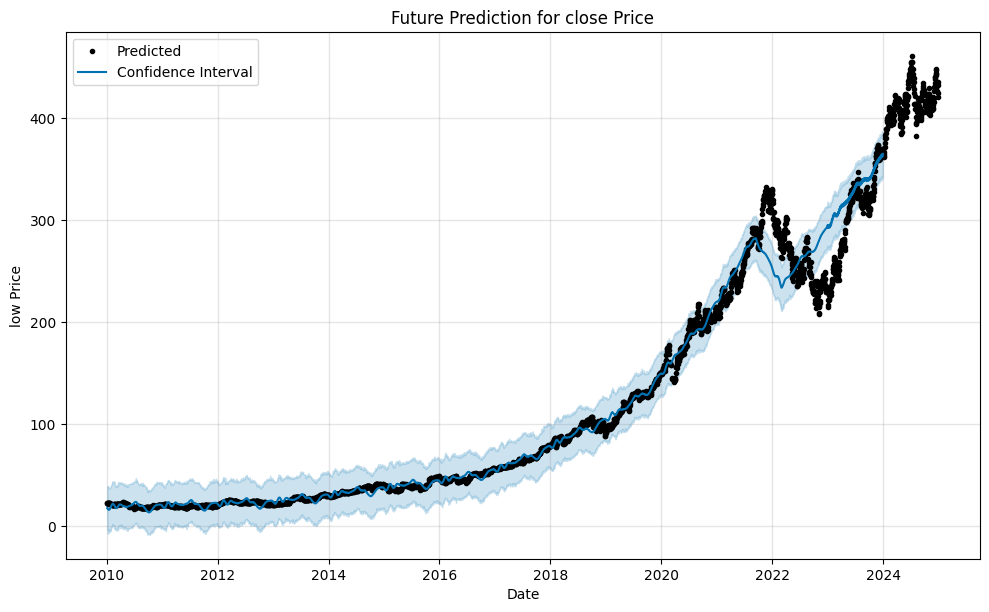

In [ ]:
#ploting future predictions
fig = new_model_low.plot(new_forecast_low)
plt.title("Future Prediction for close Price")
plt.xlabel("Date")
plt.ylabel("low Price")
# Add legend to specify what each color represents
plt.legend(labels=['Predicted', 'Confidence Interval'], loc='upper left')
plt.show()


ARIMA

In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] < 0.05:
    print("✅ Series is stationary")
else:
    print("❌ Series is not stationary (consider differencing)")


ADF Statistic: 1.5470382321834346
p-value: 0.9976896580527345
❌ Series is not stationary (consider differencing)


In [22]:
df['Close_diff'] = df['Close'].diff().dropna()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA RMSE: 83.45


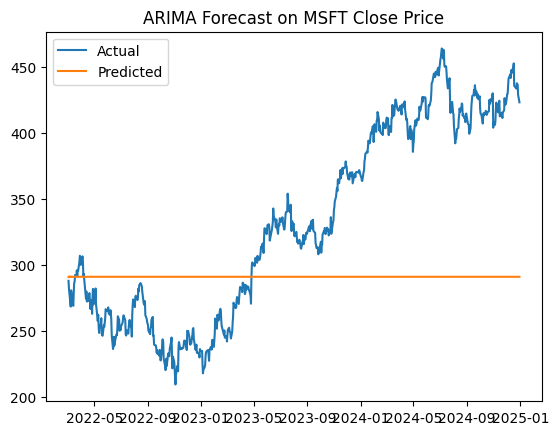

In [23]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare train-test split
close_data = df['Close'].dropna()
train_size = int(len(close_data) * 0.8)
train, test = close_data[:train_size], close_data[train_size:]

# Fit ARIMA (you can test different orders)
model = ARIMA(train, order=(5, 1, 0))  # (p,d,q) — try other configs too
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"ARIMA RMSE: {rmse:.2f}")

# Plot
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Predicted')
plt.title("ARIMA Forecast on MSFT Close Price")
plt.legend()
plt.show()


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming 'forecast' and 'test' are aligned
mae_arima = mean_absolute_error(test, forecast)
rmse_arima = np.sqrt(mean_squared_error(test, forecast))
r2_arima = r2_score(test, forecast)

print("--- ARIMA ---")
print(f"MAE: {mae_arima:.2f}")
print(f"RMSE: {rmse_arima:.2f}")
print(f"R²: {r2_arima:.4f}")

--- ARIMA ---
MAE: 69.29
RMSE: 83.45
R²: -0.3153


[*********************100%***********************]  1 of 1 completed



---  SARIMA Evaluation ---
MAE: 42.91
RMSE: 47.90
R²: -0.4260


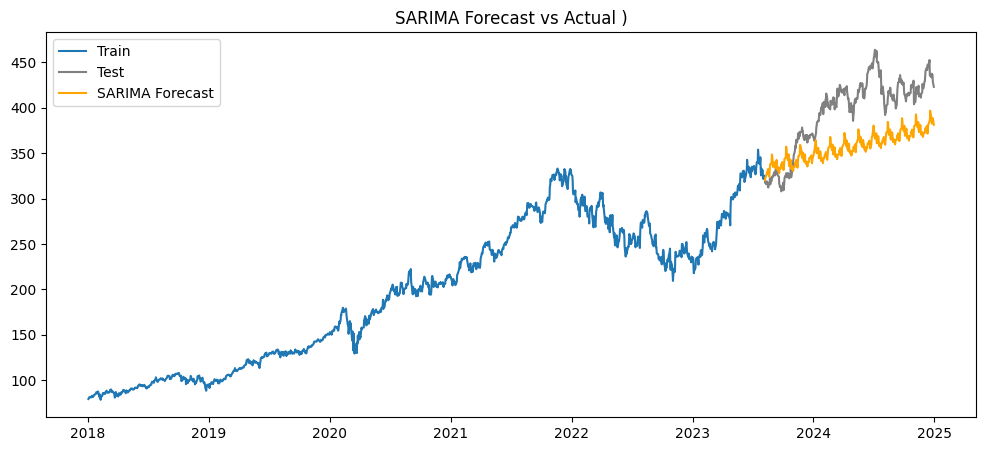

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1. Load shorter time range for faster modeling
df = yf.download("MSFT", start="2018-01-01", end="2024-12-31")
df = df[['Close']].dropna()

# 2. Train-Test Split (80/20)
split = int(len(df) * 0.8)
train, test = df[:split], df[split:]

# 3. SARIMA model with smaller seasonal period (30 ≈ 1 month)
model = SARIMAX(train['Close'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 0, 30),
                enforce_stationarity=False,
                enforce_invertibility=False)

sarima_fit = model.fit(disp=False)

# 4. Forecast
forecast = sarima_fit.forecast(steps=len(test))

# 5. Evaluation
mae = mean_absolute_error(test['Close'], forecast)
rmse = np.sqrt(mean_squared_error(test['Close'], forecast))
r2 = r2_score(test['Close'], forecast)

print("\n---  SARIMA Evaluation ---")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# 6. Plot
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test', color='gray')
plt.plot(test.index, forecast, label='SARIMA Forecast', color='orange')
plt.title('SARIMA Forecast vs Actual )')
plt.legend()
plt.show()



LSTM

In [1]:
!pip install yfinance


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [ ]:
df=yf.download("MSFT", start="2010-01-04", end="2024-12-31")
df

<ipython-input-4-3838287772>:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download("MSFT", start="2010-01-04", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2010-01-04,23.211445,23.323939,22.941457,22.963956,38409100
2010-01-05,23.218939,23.323935,22.978950,23.136444,49749600
2010-01-06,23.076452,23.308941,22.888961,23.158948,58182400
2010-01-07,22.836454,23.023946,22.641463,22.971447,50559700
2010-01-08,22.993944,23.158936,22.678959,22.708958,51197400
...,...,...,...,...,...
2024-12-23,433.583038,435.973841,431.172293,435.067322,19152500
2024-12-24,437.647400,437.916385,432.527101,432.985331,7164500


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 0.0737 - val_loss: 0.0327
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0268 - val_loss: 0.0179
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0152 - val_loss: 0.0123
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0092 - val_loss: 0.0075
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0042 - val_loss: 0.0060
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 0.0025 - val_loss: 0.0030
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0

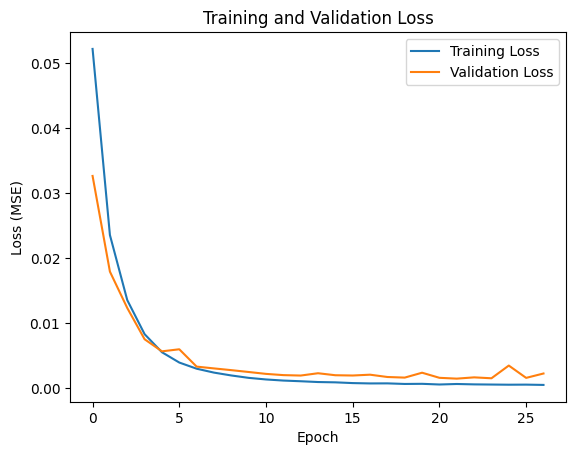

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
--- LSTM Model Metrics ---
MAE: 12.56
RMSE: 15.46
R² Score: 0.9534


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

#  Hyperparameters
sequence_length = 60
dropout_rate = 0.1
l2_lambda = 0.001

data = df['Close'].values.reshape(-1, 1)

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
x, y = [], []
for i in range(sequence_length, len(scaled_data)):
    x.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

x, y = np.array(x), np.array(y)

# Split into training (80%) and validation (20%) — time series style
split = int(len(x) * 0.8)
x_train, y_train = x[:split], y[:split]
x_val, y_val = x[split:], y[split:]

# Model with L2 Regularization, Dropout, EarlyStopping
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=True, kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(Dropout(dropout_rate))
model.add(LSTM(32, return_sequences=False, kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(Dropout(dropout_rate))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

#  Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

#  Evaluate model
predictions = model.predict(x_val)
predictions = scaler.inverse_transform(predictions)
y_true = scaler.inverse_transform(y_val)

mae = mean_absolute_error(y_true, predictions)
rmse = np.sqrt(mean_squared_error(y_true, predictions))
r2 = r2_score(y_true, predictions)

print(f"--- LSTM Model Metrics ---")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
